# Cycling data 4: Calculate bearing and wind direction

### Contents
1. Pure python
2. Turfpy 
3. Calculate bearing within a Pandas dataframe
4. Wind: meewind, tegenwind, zijwind

#### To do:
- [ ] Clean up dataframes of real life examples
- [ ] Comments
- [ ] Tutorial
- [ ] Make drawings for tutorial


## 1. Pure python

In [2]:
# source:https://exceptionshub.com/haversine-formula-in-python-bearing-and-distance-between-two-gps-points.html
from math import *

#define two points
lat1 = 52.358623
lon1 = 4.862210

lat2 = 52.358518
lon2 = 4.862165

# convert the points to radians
lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

# use the formula from the website
bearing = (degrees(atan2(sin(lon2-lon1)*cos(lat2), cos(lat1)*sin(lat2)-sin(lat1)*cos(lat2)*cos(lon2-lon1)))+360) % 360

print(bearing)


194.66737480655848


In [4]:
def bearing():
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, long2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    Base = 6371 * c

    bearing = atan2(sin(lon2-lon1)*cos(lat2), cos(lat1)*sin(lat2)-sin(lat1)*cos(lat2)*cos(lon2-lon1))
    bearing = degrees(bearing)
    bearing = (bearing + 360) % 360
    return bearing

<function __main__.bearing()>

In [5]:
#source: https://www.analytics-link.com/post/2018/08/21/calculating-the-compass-direction-between-two-points-in-python
import math
def direction_lookup(destination_x, origin_x, destination_y, origin_y):
    deltaX = destination_x - origin_x
    deltaY = destination_y - origin_y
    degrees_temp = math.atan2(deltaX, deltaY)/math.pi*180

    if degrees_temp < 0:

        degrees_final = 360 + degrees_temp

    else:
        degrees_final = degrees_temp

    compass_brackets = ["N", "NE", "E", "SE", "S", "SW", "W", "NW", "N"]
    compass_lookup = round(degrees_final / 45)
    return compass_brackets[compass_lookup], degrees_final

 

direction_lookup(4.8,4.7,52.4,52.4)



('E', 90.0)

## 2. Turfpy

Turfpy is a Python library for performing geospatial data analysis which reimplements turf.js.
See: https://pypi.org/project/turfpy/ and https://turfpy.readthedocs.io/en/latest/

In [7]:
!pip install turfpy

In [10]:
from turfpy import measurement
from geojson import Point, Feature

start = Feature(geometry=Point((0.0, 0.0)))
end = Feature(geometry=Point((1.0, 0.0))) #south
degrees = measurement.bearing(start, end)
degrees = (degrees+360) %360
degrees

90.0

In [11]:
from turfpy import measurement
from geojson import Point, Feature

start = Feature(geometry=Point((52.34, 4.86)))
end = Feature(geometry=Point((52.33, 4.86)))
degrees = measurement.bearing(start, end)
degrees = (degrees+360) %360
degrees

270.0004236066087

## 3. Calculating bearing within a Pandas df

In [13]:
import pandas as pd
data2 = [[52.3, 4.8],[52.4, 4.7]] #(4.8,4.7,52.4,52.4)
df2 = pd.DataFrame(data2, columns=['lat', 'lon'])
print(df2)

    lat  lon
0  52.3  4.8
1  52.4  4.7


In [14]:
df2['delta_lon'] = df2.lon.diff()
df2['delta_lat'] = df2.lat.diff()
df2.head()

,lat,lon,delta_lon,delta_lat
0,52.3,4.8,NaN,NaN
1,52.4,4.7,-0.1,0.1


In [15]:
import numpy as np
from math import *
df2['bearing'] =np.arctan2(df2['delta_lon'], df2['delta_lat'])/pi*180
df2['degrees'] = (df2['bearing']+360) %360
df2

,lat,lon,delta_lon,delta_lat,bearing,degrees
0,52.3,4.8,NaN,NaN,NaN,NaN
1,52.4,4.7,-0.1,0.1,-45.0,315.0


### Same as above but with simple data

In [22]:
import pandas as pd
data = [[0,0],[0,1]]
df = pd.DataFrame(data, columns=['lat', 'lon'])
print(df)

   lat  lon
0    0    0
1    0    1


In [23]:
df['delta_lon'] = df.lon.diff()
df['delta_lat'] = df.lat.diff()
df.head()

,lat,lon,delta_lon,delta_lat
0,0,0,NaN,NaN
1,0,1,1.0,0.0


In [24]:
import numpy as np

from math import *
df['bearing'] =np.arctan2(df['delta_lon'], df['delta_lat'])/pi*180
df['degrees'] = (df['bearing']+360) %360
df

,lat,lon,delta_lon,delta_lat,bearing,degrees
0,0,0,NaN,NaN,NaN,NaN
1,0,1,1.0,0.0,90.0,90.0


## 4. Wind: mee, tegen, zijwind

In [26]:
import pandas as pd
data2 = [[52.4, 4.8, 90],[52.4, 4.7,90], [52.4, 4.8,90], [52.3, 4.8,90]] #(4.8,4.7,52.4,52.4)
df2 = pd.DataFrame(data2, columns=['lat', 'lon', 'wind_direction'])
print(df2)

    lat  lon  wind_direction
0  52.4  4.8              90
1  52.4  4.7              90
2  52.4  4.8              90
3  52.3  4.8              90


In [27]:
df2['delta_lon'] = df2.lon.diff()
df2['delta_lat'] = df2.lat.diff()
df2.head()

,lat,lon,wind_direction,delta_lon,delta_lat
0,52.4,4.8,90,NaN,NaN
1,52.4,4.7,90,-0.1,0.0
2,52.4,4.8,90,0.1,0.0
3,52.3,4.8,90,0.0,-0.1


In [30]:
#meewind is defind as wind_difference <=45 and >= 315
#tegenwind is defined as wind_differene <=225 and >= 135 

import numpy as np
from math import *
df2['bearing'] =np.arctan2(df2['delta_lon'], df2['delta_lat'])/pi*180
df2['bearing_abs'] = (df2['bearing']+360) %360
df2['wind_diff']= df2['bearing_abs']-df2['wind_direction']
df2['Meewind'] = np.logical_or(df2['wind_diff']<=45, df2['wind_diff']>=315)
df2['Tegenwind'] = np.logical_and(df2['wind_diff'] <= 225, df2['wind_diff'] >= 135)
df2




,lat,lon,wind_direction,delta_lon,delta_lat,bearing,bearing_abs,wind_diff,Meewind,Tegenwind
0,52.4,4.8,90,NaN,NaN,NaN,NaN,NaN,False,False
1,52.4,4.7,90,-0.1,0.0,-90.0,270.0,180.0,False,True
2,52.4,4.8,90,0.1,0.0,90.0,90.0,0.0,True,False
3,52.3,4.8,90,0.0,-0.1,180.0,180.0,90.0,False,False


## 5. Use real life data

In [1]:
from fitparse import FitFile
import pandas as pd

fitfile = FitFile('Vamberg.fit') ### enter the name of the file here!

while True:
    try:
        fitfile.messages
        break
    except KeyError:
        continue
workout = []
for record in fitfile.get_messages('record'):
    r = {}
    for record_data in record:
        r[record_data.name] = record_data.value
    workout.append(r)
print('done')

done


In [2]:
fietsdata = pd.DataFrame(workout) # read the workout into a pandas dataframe 
fietsdata.head() # print the first five rows of the dataframe

,accumulated_power,altitude,cadence,calories,distance,enhanced_altitude,enhanced_speed,grade,heart_rate,left_pedal_smoothness,left_right_balance,left_torque_effectiveness,position_lat,position_long,power,right_pedal_smoothness,right_torque_effectiveness,speed,temperature,timestamp
0,39407.0,2640.0,48.0,0.0,0.0,28.0,2.325,None,111,None,None,None,624662703.0,58008426.0,195.0,None,None,2325.0,23,2020-07-11 04:11:00
1,39407.0,2640.0,48.0,0.0,20.0,28.0,1.846,None,111,None,None,None,624661450.0,58007889.0,195.0,None,None,1846.0,23,2020-07-11 04:11:01
2,39407.0,2640.0,48.0,0.0,20.0,28.0,3.400,None,111,None,None,None,624661351.0,58008167.0,195.0,None,None,3400.0,23,2020-07-11 04:11:02
3,39453.0,2640.0,30.0,0.0,23.0,28.0,1.255,None,116,None,None,None,624661351.0,58008426.0,47.0,None,None,1255.0,23,2020-07-11 04:11:03
4,39510.0,2640.0,30.0,0.0,23.0,28.0,0.000,None,116,None,None,None,624661530.0,58008724.0,57.0,None,None,0.0,23,2020-07-11 04:11:04


In [3]:
#Convert semi circles to degrees
fietsdata['lat'] = fietsdata['position_lat']*  (180 / 2**31)
fietsdata['lon'] = fietsdata['position_long']*  (180 / 2**31)
fietsdata.head()

,accumulated_power,altitude,cadence,calories,distance,enhanced_altitude,enhanced_speed,grade,heart_rate,left_pedal_smoothness,...,position_lat,position_long,power,right_pedal_smoothness,right_torque_effectiveness,speed,temperature,timestamp,lat,lon
0,39407.0,2640.0,48.0,0.0,0.0,28.0,2.325,None,111,None,...,624662703.0,58008426.0,195.0,None,None,2325.0,23,2020-07-11 04:11:00,52.358623,4.862210
1,39407.0,2640.0,48.0,0.0,20.0,28.0,1.846,None,111,None,...,624661450.0,58007889.0,195.0,None,None,1846.0,23,2020-07-11 04:11:01,52.358518,4.862165
2,39407.0,2640.0,48.0,0.0,20.0,28.0,3.400,None,111,None,...,624661351.0,58008167.0,195.0,None,None,3400.0,23,2020-07-11 04:11:02,52.358510,4.862188
3,39453.0,2640.0,30.0,0.0,23.0,28.0,1.255,None,116,None,...,624661351.0,58008426.0,47.0,None,None,1255.0,23,2020-07-11 04:11:03,52.358510,4.862210
4,39510.0,2640.0,30.0,0.0,23.0,28.0,0.000,None,116,None,...,624661530.0,58008724.0,57.0,None,None,0.0,23,2020-07-11 04:11:04,52.358525,4.862235


In [5]:
#calculate the difference between current en previous lat / lon
fietsdata['delta_lon'] = fietsdata.lon.diff()
fietsdata['delta_lat'] = fietsdata.lat.diff()
fietsdata.head()

,accumulated_power,altitude,cadence,calories,distance,enhanced_altitude,enhanced_speed,grade,heart_rate,left_pedal_smoothness,...,power,right_pedal_smoothness,right_torque_effectiveness,speed,temperature,timestamp,lat,lon,delta_lon,delta_lat
0,39407.0,2640.0,48.0,0.0,0.0,28.0,2.325,None,111,None,...,195.0,None,None,2325.0,23,2020-07-11 04:11:00,52.358623,4.862210,NaN,NaN
1,39407.0,2640.0,48.0,0.0,20.0,28.0,1.846,None,111,None,...,195.0,None,None,1846.0,23,2020-07-11 04:11:01,52.358518,4.862165,-0.000045,-0.000105
2,39407.0,2640.0,48.0,0.0,20.0,28.0,3.400,None,111,None,...,195.0,None,None,3400.0,23,2020-07-11 04:11:02,52.358510,4.862188,0.000023,-0.000008
3,39453.0,2640.0,30.0,0.0,23.0,28.0,1.255,None,116,None,...,47.0,None,None,1255.0,23,2020-07-11 04:11:03,52.358510,4.862210,0.000022,0.000000
4,39510.0,2640.0,30.0,0.0,23.0,28.0,0.000,None,116,None,...,57.0,None,None,0.0,23,2020-07-11 04:11:04,52.358525,4.862235,0.000025,0.000015


### Merge new dataframe 'wind'

In [11]:
#Create a new column with constant wind (mvp)
fietsdata['wind'] = 90 #let
fietsdata.tail()

,accumulated_power,altitude,cadence,calories,distance,enhanced_altitude,enhanced_speed,grade,heart_rate,left_pedal_smoothness,...,speed,temperature,timestamp,lat,lon,delta_lon,delta_lat,bearing,degrees,wind
23805,8576833.0,2500.0,0.0,5419.0,171596.0,0.0,0.0,None,128,None,...,0.0,22,2020-07-11 11:59:40,52.733881,6.473130,0.000005,0.000003,55.864060,55.864060,90
23806,8576833.0,2500.0,0.0,5419.0,171596.0,0.0,0.0,None,128,None,...,0.0,22,2020-07-11 11:59:41,52.733883,6.473130,0.000000,0.000002,0.000000,0.000000,90
23807,8576833.0,2500.0,0.0,5419.0,171596.0,0.0,0.0,None,128,None,...,0.0,22,2020-07-11 11:59:42,52.733883,6.473128,-0.000002,0.000000,-90.000000,270.000000,90
23808,8576833.0,2500.0,0.0,5419.0,171596.0,0.0,0.0,None,129,None,...,0.0,22,2020-07-11 11:59:43,52.733881,6.473130,0.000002,-0.000002,136.468801,136.468801,90
23809,8576833.0,2500.0,0.0,5419.0,171596.0,0.0,0.0,None,130,None,...,0.0,22,2020-07-11 11:59:44,52.733881,6.473130,0.000000,0.000000,0.000000,0.000000,90


In [12]:
#Calculate the bearing and degrees and determine 'wind mee' 'wind tegen'
import numpy as np
from math import *
fietsdata['bearing'] =np.arctan2(fietsdata['delta_lon'], fietsdata['delta_lat'])/pi*180
fietsdata['degrees'] = (fietsdata['bearing']+360) %360
fietsdata['wind_diff']= fietsdata['degrees']-fietsdata['wind']
fietsdata['Meewind'] = np.logical_or(fietsdata['wind_diff']<=45, fietsdata['wind_diff']>=315)
fietsdata['Tegenwind'] = np.logical_and(fietsdata['wind_diff'] <= 225, fietsdata['wind_diff'] >= 135)
fietsdata.head()

,accumulated_power,altitude,cadence,calories,distance,enhanced_altitude,enhanced_speed,grade,heart_rate,left_pedal_smoothness,...,lat,lon,delta_lon,delta_lat,bearing,degrees,wind,wind_diff,Meewind,Tegenwind
0,39407.0,2640.0,48.0,0.0,0.0,28.0,2.325,None,111,None,...,52.358623,4.862210,NaN,NaN,NaN,NaN,90,NaN,False,False
1,39407.0,2640.0,48.0,0.0,20.0,28.0,1.846,None,111,None,...,52.358518,4.862165,-0.000045,-0.000105,-156.801409,203.198591,90,113.198591,False,False
2,39407.0,2640.0,48.0,0.0,20.0,28.0,3.400,None,111,None,...,52.358510,4.862188,0.000023,-0.000008,109.601583,109.601583,90,19.601583,True,False
3,39453.0,2640.0,30.0,0.0,23.0,28.0,1.255,None,116,None,...,52.358510,4.862210,0.000022,0.000000,90.000000,90.000000,90,0.000000,True,False
4,39510.0,2640.0,30.0,0.0,23.0,28.0,0.000,None,116,None,...,52.358525,4.862235,0.000025,0.000015,59.007977,59.007977,90,-30.992023,True,False


## Show the data in some graphs

<IPython.core.display.Javascript object>


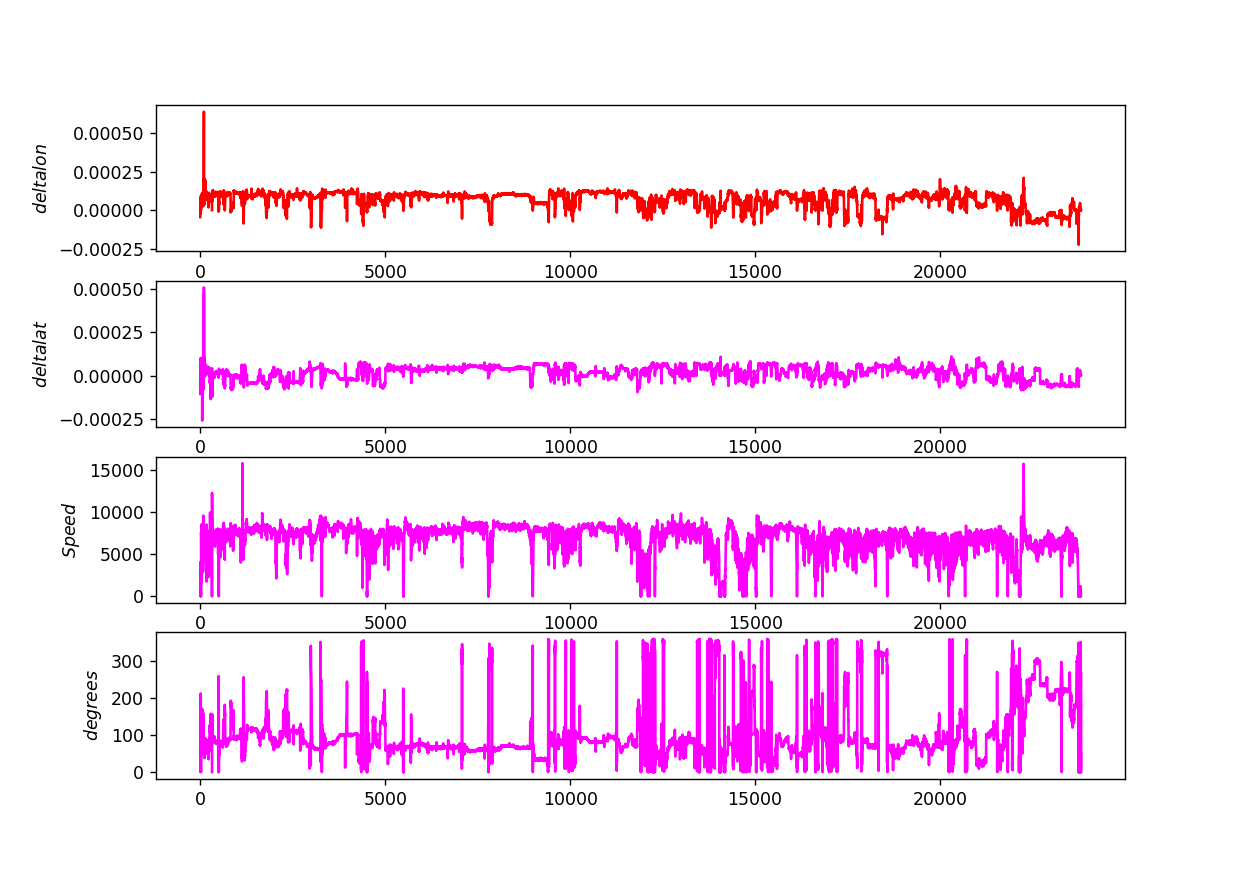

Text(0, 0.5, '$degrees$')

In [17]:
# Some basic graphs
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))#use this to set size of figure

######## write the data to a variable ###########

dlon = fietsdata.delta_lon
dlat = fietsdata.delta_lat
s = fietsdata.speed
deg = fietsdata.degrees


####### make the subplots ##########
plt.subplot(4,1,1)
plt.plot(dlon, color='red', linewidth=1.5)
plt.ylabel(r'$delta lon$') # y label

plt.subplot(4,1,2)
plt.plot(dlat, color='magenta', linewidth=1.5)
plt.ylabel(r'$delta lat$') # y label

plt.subplot(4,1,3)
plt.plot(s, color='magenta', linewidth=1.5)
plt.ylabel(r'$degrees$') # y label


In [27]:
fietsdata = fietsdata.replace({'Meewind': {True: 1,  False: 0}})
fietsdata = fietsdata.replace({'Tegenwind': {True:1, False: 0}})
fietsdata.tail(50)
  

,accumulated_power,altitude,cadence,calories,distance,enhanced_altitude,enhanced_speed,grade,heart_rate,left_pedal_smoothness,...,lat,lon,delta_lon,delta_lat,bearing,degrees,wind,wind_diff,Meewind,Tegenwind
23760,8576833.0,2500.0,0.0,5418.0,171552.0,0.0,1.070,None,131,None,...,52.733565,6.472638,0.000022,0.000012,61.778455,61.778455,90,-28.221545,1,0
23761,8576833.0,2500.0,0.0,5418.0,171556.0,0.0,0.920,None,131,None,...,52.733575,6.472653,0.000015,0.000010,56.383862,56.383862,90,-33.616138,1,0
23762,8576833.0,2500.0,0.0,5418.0,171556.0,0.0,0.853,None,130,None,...,52.733583,6.472670,0.000017,0.000008,63.203919,63.203919,90,-26.796081,1,0
23763,8576833.0,2500.0,0.0,5418.0,171558.0,0.0,0.915,None,130,None,...,52.733588,6.472683,0.000013,0.000005,69.325575,69.325575,90,-20.674425,1,0
23764,8576833.0,2500.0,0.0,5418.0,171558.0,0.0,0.838,None,129,None,...,52.733595,6.472698,0.000015,0.000007,66.186176,66.186176,90,-23.813824,1,0
23765,8576833.0,2500.0,0.0,5418.0,171560.0,0.0,0.900,None,128,None,...,52.733598,6.472715,0.000017,0.000003,78.634709,78.634709,90,-11.365291,1,0
23766,8576833.0,2500.0,0.0,5418.0,171560.0,0.0,1.147,None,128,None,...,52.733606,6.472727,0.000012,0.000008,54.540382,54.540382,90,-35.459618,1,0
23767,8576833.0,2500.0,0.0,5418.0,171563.0,0.0,1.059,None,128,None,...,52.733613,6.472743,0.000017,0.000007,68.099377,68.099377,90,-21.900623,1,0
23768,8576833.0,2500.0,0.0,5418.0,171563.0,0.0,1.090,None,127,None,...,52.733618,6.472757,0.000013,0.000005,69.641662,69.641662,90,-20.358338,1,0
23769,8576833.0,2500.0,0.0,5418.0,171565.0,0.0,1.126,None,127,None,...,52.733626,6.472770,0.000013,0.000008,57.832947,57.832947,90,-32.167053,1,0


<IPython.core.display.Javascript object>


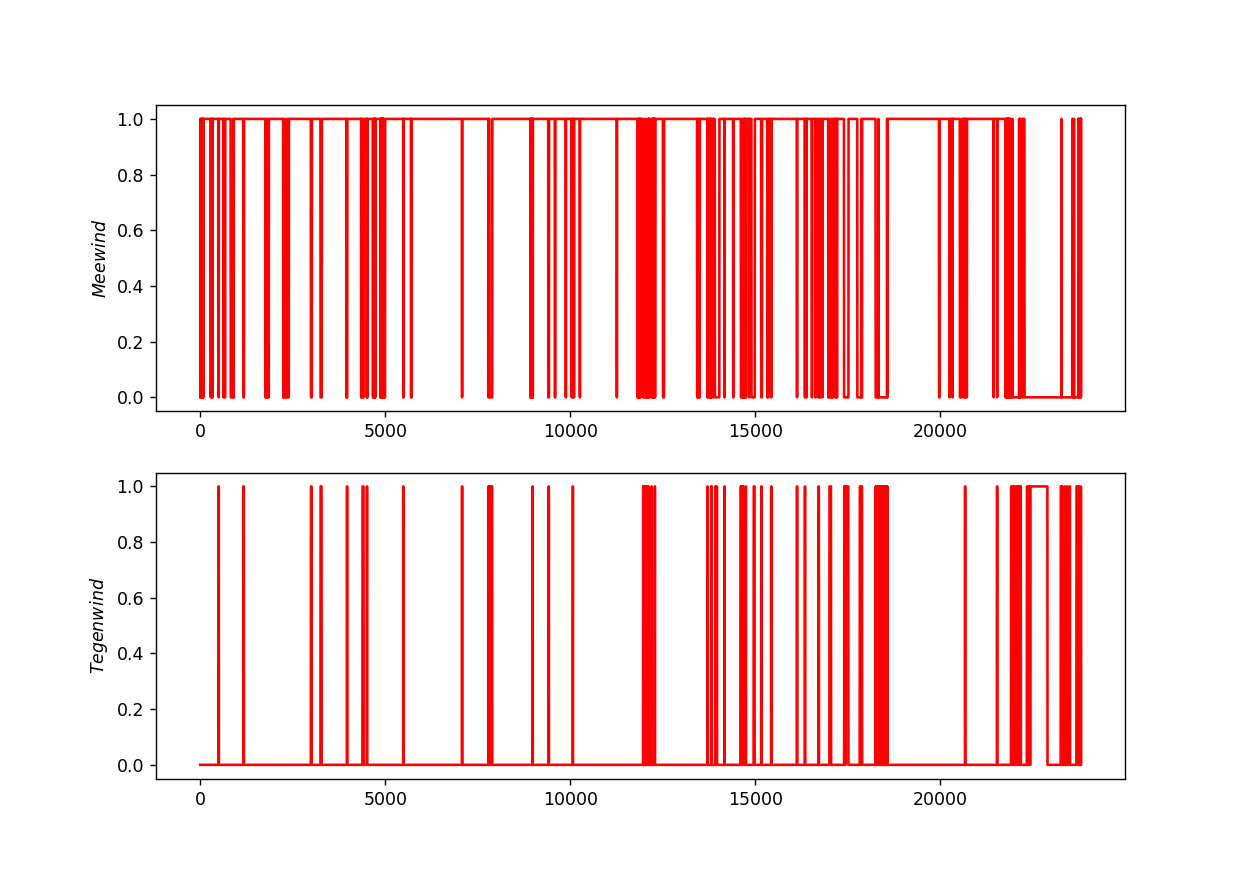

Text(0, 0.5, '$Tegenwind$')

In [23]:
# Wind mee, wind tegen grafiek
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))#use this to set size of figure

######## write the data to a variable ###########

mee = fietsdata.Meewind
tegen = fietsdata.Tegenwind

####### make the subplots ##########
plt.subplot(2,1,1)
plt.plot(mee, color='red', linewidth=1.5)
plt.ylabel(r'$Meewind$') # y label

plt.subplot(2,1,2)
plt.plot(tegen, color='red', linewidth=1.5)
plt.ylabel(r'$Tegenwind$') # y label